In [ ]:
!pip install llnl-thicket==2024.1.0

In [ ]:
import sys
sys.path.append("/thicket")
from glob import glob
from tabulate import tabulate

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Define the path to your caliper folder in Google Drive
caliper_folder = '/content/drive/My Drive/caliper/'

# List the files in the caliper folder to verify
files = os.listdir(caliper_folder)
print(files)


['Sorted-p8-a26.cali', 'Sorted-p8-a28.cali', 'Sorted-p8-a24.cali', 'Sorted-p8-a22.cali', 'Sorted-p8-a18.cali', 'Sorted-p8-a20.cali', 'Sorted-p8-a16.cali', 'Sorted-p64-a28.cali', 'Sorted-p64-a26.cali', 'Sorted-p64-a24.cali', 'Sorted-p64-a22.cali', 'Sorted-p64-a20.cali', 'Sorted-p64-a18.cali', 'Sorted-p64-a16.cali', 'Sorted-p512-a28.cali', 'Sorted-p512-a26.cali', 'Sorted-p512-a24.cali', 'Sorted-p512-a22.cali', 'Sorted-p512-a20.cali', 'Sorted-p512-a18.cali', 'Sorted-p512-a16.cali', 'Sorted-p4-a28.cali', 'Sorted-p4-a26.cali', 'Sorted-p4-a24.cali', 'Sorted-p4-a22.cali', 'Sorted-p4-a20.cali', 'Sorted-p4-a18.cali', 'Sorted-p4-a16.cali', 'Sorted-p32-a28.cali', 'Sorted-p32-a26.cali', 'Sorted-p32-a24.cali', 'Sorted-p32-a22.cali', 'Sorted-p32-a20.cali', 'Sorted-p32-a18.cali', 'Sorted-p32-a16.cali', 'Sorted-p256-a28.cali', 'Sorted-p256-a26.cali', 'Sorted-p256-a24.cali', 'Sorted-p256-a22.cali', 'Sorted-p256-a18.cali', 'Sorted-p256-a20.cali', 'Sorted-p256-a16.cali', 'Sorted-p2-a28.cali', 'Sorted-p2-

Read all files

In [ ]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob(os.path.join(caliper_folder, "*.cali")))

(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 70.20it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [ ]:
print(tk.metadata)

           cali.caliper.version  mpi.world.size  \
profile                                           
56229743                 2.11.0             256   
57055709                 2.11.0               8   
68383351                 2.11.0              16   
73211489                 2.11.0              32   
76614611                 2.11.0             128   
...                         ...             ...   
4207503926               2.11.0               4   
4221000395               2.11.0               4   
4238954742               2.11.0              32   
4279545128               2.11.0              32   
4288941758               2.11.0               8   

                                                 spot.metrics  \
profile                                                         
56229743    min#inclusive#sum#time.duration,max#inclusive#...   
57055709    min#inclusive#sum#time.duration,max#inclusive#...   
68383351    min#inclusive#sum#time.duration,max#inclusive#...   
73211489   

View Calltree

In [ ]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

14.848 main
├─ 12.283 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Initialized
└─ 2.565 main
   ├─ 0.039 comm
   │  └─ 0.039 comm_large
   │     ├─ 0.030 MPI_Recv
   │     └─ 0.011 MPI_Send
   ├─ 0.397 comp
   │  ├─ 0.299 comp_large
   │  └─ 0.248 comp_small
   ├─ 0.007 correctness_check
   └─ 2.120 data_init
      └─ 0.000 MPI_Init



Group Performance data by `matrix_size` in the Thicket metadata table.

In [ ]:
tk.metadata.columns


Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:profile.mpi', 'spot:region.count', 'spot:time.exclusive',
       'spot:time.variance', 'launchdate', 'libraries', 'cmdline', 'cluster',
       'algorithm', 'programming_model', 'data_type', 'size_of_data_type',
       'input_size', 'input_type', 'num_procs', 'scalability', 'group_num',
       'implementation_source'],
      dtype='object')

In [ ]:
tk.dataframe.columns

Index(['nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank',
       'Min time/rank (exc)', 'Max time/rank (exc)', 'Avg time/rank (exc)',
       'Total time (exc)', 'Calls/rank (min)', 'Calls/rank (avg)',
       'Calls/rank (max)', 'Calls/rank (total)', 'name'],
      dtype='object')

In [ ]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [ ]:
# def plot_strong_scaling(df, md, input_size, title):
#     print(df.columns)
#     fig, ax = plt.subplots(figsize=(10, 6))
#     input_types = md['input_type'].unique()

#     for input_type in input_types:
#         filtered_df = df[(df['input_size'] == input_size) & (df['input_type'] == input_type)]
#         ax.plot(filtered_df['num_procs'], filtered_df['spot:time.exclusive'], label=f'{input_type}')

#     ax.set_title(title)
#     ax.set_xlabel('Number of MPI Processes')
#     ax.set_ylabel('Execution Time')
#     ax.legend()
#     plt.grid(True)
#     plt.show()

# DoOESNT WORK

In [ ]:
# def plot_speedup(df, input_type, title):
#     fig, ax = plt.subplots(figsize=(10, 6))
#     base_time = (df[(df['input_type'] == input_type) & (df['num_procs'] == df['num_procs'].min())]['spot:time.exclusive'].values[0]) * 2
#     df['speedup'] = base_time / df['spot:time.exclusive']

#     ax.plot(df['num_procs'], df['speedup'], marker='o', label=f'{input_type}')
#     ax.set_title(title)
#     ax.set_xlabel('Number of Processes')
#     ax.set_ylabel('Speedup')
#     ax.legend()
#     plt.grid(True)
#     plt.show()
# DOESNT WORK

In [ ]:
# def plot_weak_scaling(df, input_type, title):
#     fig, ax = plt.subplots(figsize=(10, 6))
#     ax.plot(df['num_procs'], df['spot:time.exclusive'], marker='o', label=f'{input_type}')

#     ax.set_title(title)
#     ax.set_xlabel('Number of Processes')
#     ax.set_ylabel('Execution Time')
#     ax.legend()
#     plt.grid(True)
#     plt.show()
#DOESNT WORK

In [ ]:
def plot_mpl(df, title, xlabel, ylabel, legend):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(legend)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    return fig, ax

In [ ]:
print(tk.dataframe.columns)


Index(['nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank',
       'Min time/rank (exc)', 'Max time/rank (exc)', 'Avg time/rank (exc)',
       'Total time (exc)', 'Calls/rank (min)', 'Calls/rank (avg)',
       'Calls/rank (max)', 'Calls/rank (total)', 'name'],
      dtype='object')


In [ ]:
tk.metadata.index

Index([  56229743,   57055709,   68383351,   73211489,   76614611,  145906483,
        175674112,  208585216,  217817990,  246013046,
       ...
       4143119784, 4156699691, 4184400486, 4192666193, 4202764798, 4207503926,
       4221000395, 4238954742, 4279545128, 4288941758],
      dtype='int64', name='profile', length=241)

In [ ]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [ ]:
# tk.metadata_column_to_perfdata("num_procs")
# tk.metadata_column_to_perfdata("input_size")
# tk.metadata_column_to_perfdata("input_type")

# tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

print(tk.dataframe)

                                                     nid   spot.channel  \
node                                     profile                          
{'name': 'main', 'type': 'function'}     56229743    1.0  regionprofile   
                                         57055709    1.0  regionprofile   
                                         68383351    1.0  regionprofile   
                                         73211489    1.0  regionprofile   
                                         76614611    1.0  regionprofile   
...                                                  ...            ...   
{'name': 'MPI_Init', 'type': 'function'} 4207503926  4.0  regionprofile   
                                         4221000395  4.0  regionprofile   
                                         4238954742  4.0  regionprofile   
                                         4279545128  4.0  regionprofile   
                                         4288941758  4.0  regionprofile   

                        

In [ ]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512,1024]
array_sizes = [2**16, 2**18, 2**20, 4194304, 2**24, 2**26, 2**28]
input_types = ["Random", "Sorted", "Reverse", 'Perturbed']

In [ ]:
import math
# shows the plots of individual runs
title_template = "Merge Sort {} for {} Array Elements"
for node in tk.graph.traverse():
    if node.frame['name'] == 'main' or node.frame['name'] == 'comp' or node.frame['name'] == 'comm':
        # for input size n, plot 4 plots for each input_type
        for arySize in array_sizes:
            # title will be node.frame['name']_input_size
            title = title_template.format(node.frame['name'], f'2^{math.log2(arySize)}')
            df = tk.dataframe.loc[node, 'Total time (exc)'] # get average time
            df = (df.loc[df.index.get_level_values('input_size') == arySize])
            df = df.unstack(level="input_type")
            df = df.unstack(level="input_size")
            print(df)
            plot_mpl(df, title, "Processes", "Total time", input_types)
            # plot_speedup(df, (input_types[0]), title)

title_template0 = "strong scaling - {}  {}"
# this is erroring but it does work, my teammates code was used to plot my graphs
for node in tk.graph.traverse():
    if node.frame['name'] == 'main' or node.frame['name'] == 'comp_large' or node.frame['name'] == 'comm':
        print(node.frame['name'])
        for itype in input_types:
            title = title_template0.format(node.frame['name'], itype)
            df = tk.dataframe.loc[node, 'Avg time/rank']
            df = (df.loc[df.index.get_level_values('input_type') == itype])
            df = df.unstack(level="input_size")
            df = df.unstack(level="input_type")
            twoProcTimes = (df.loc[df.index.get_level_values('num_procs') == 2].values)[0]

            for i in range(0,len(twoProcTimes)):
                twoProc = twoProcTimes[i]
                df[array_sizes[i]] = (df[array_sizes[i]] / (2*twoProc))**-1
            plot_mpl(df, title, "Processes", "Speedup", array_sizes)


main


KeyError: 'Requested level (input_type) does not match index name (profile)'

In [ ]:
# get clock times
title_template_main = "Merge Sort Clock Time {}"
title_template_comm = "Merge Sort Communication Time {}"
title_template_comp_large = "Merge Sort Computation (comp_large) Time {}"

# Dictionaries to store separate times for each input type
main_times = {}
comm_times = {}
comp_large_times = {}

for node in tk.graph.traverse():
    if node.frame['name'] in ['main', 'comm', 'comp_large']:
        print(node.frame['name'])
        for itype in input_types:
            title = ""
            df = tk.dataframe.loc[node, 'Avg time/rank']
            df = (df.loc[df.index.get_level_values('input_type') == itype])
            df = df.unstack(level="input_size")
            df = df.unstack(level="input_type")

            if node.frame['name'] == 'main':
                # Store main times for each input type and create plot title
                main_times[itype] = df
                title = title_template_main.format(itype)
            elif node.frame['name'] == 'comm':
                # Store comm times for each input type and create plot title
                comm_times[itype] = df
                title = title_template_comm.format(itype)
            elif node.frame['name'] == 'comp_large':
                # Store comp_large times for each input type and create plot title
                comp_large_times[itype] = df
                title = title_template_comp_large.format(itype)

            # Plot each dataframe with the corresponding title and labels
            plot_mpl(df, title, "Processes", "Time (s)", array_sizes)

main


KeyError: 'Requested level (input_type) does not match index name (profile)'

/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 71.33it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 67.47it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:04<00:00, 51.10it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 65.47it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 67.04it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 69.73it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:05<00:00, 42.60it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 66.94it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 70.68it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:04<00:00, 59.03it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:04<00:00, 51.86it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 66.03it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 69.36it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 60.08it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:04<00:00, 56.65it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 67.73it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 64.84it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:04<00:00, 49.97it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 62.74it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/My Drive/caliper/*.cali


(2/2) Creating Thicket: 100%|██████████| 240/240 [00:03<00:00, 62.02it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[2.564643, 14.848267, 2.564643, 14.848267, 2.564643]
[2.564643, 14.848267, 2.564643, 14.848267, 2.564643]
[2.564643, 14.848267, 2.564643, 14.848267, 2.564643]
[2.564643, 14.848267, 2.564643, 14.848267, 2.564643]


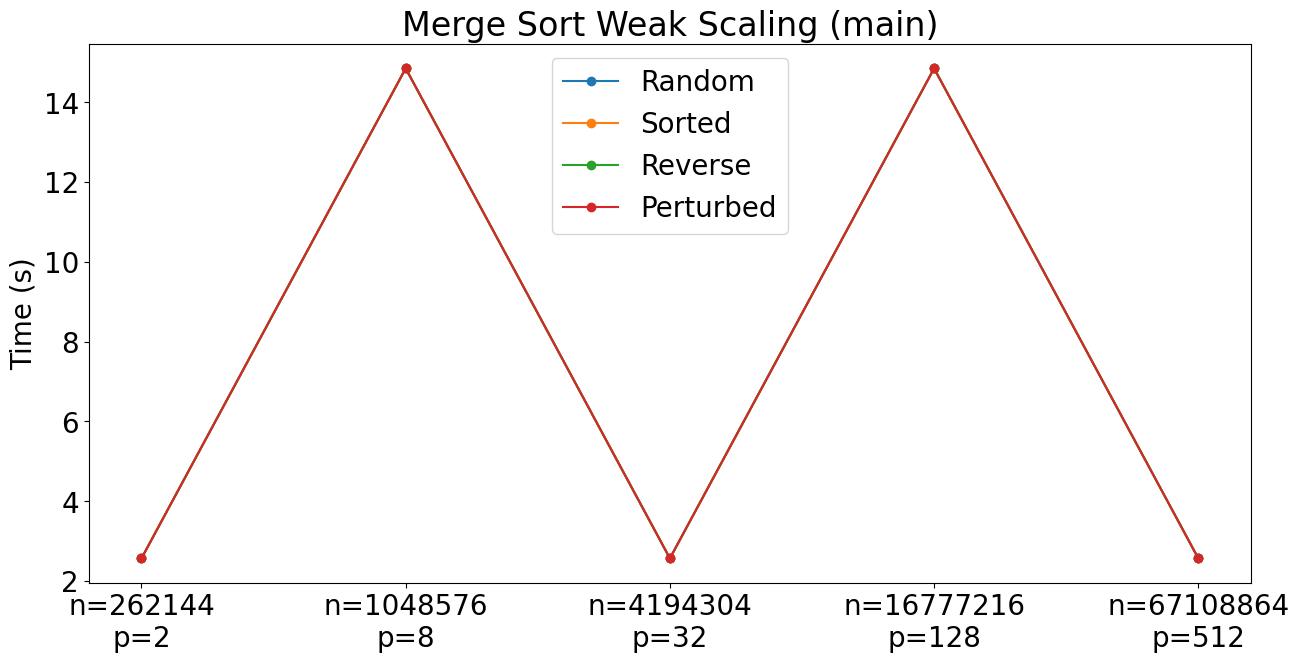

[]
[]
[]
[]


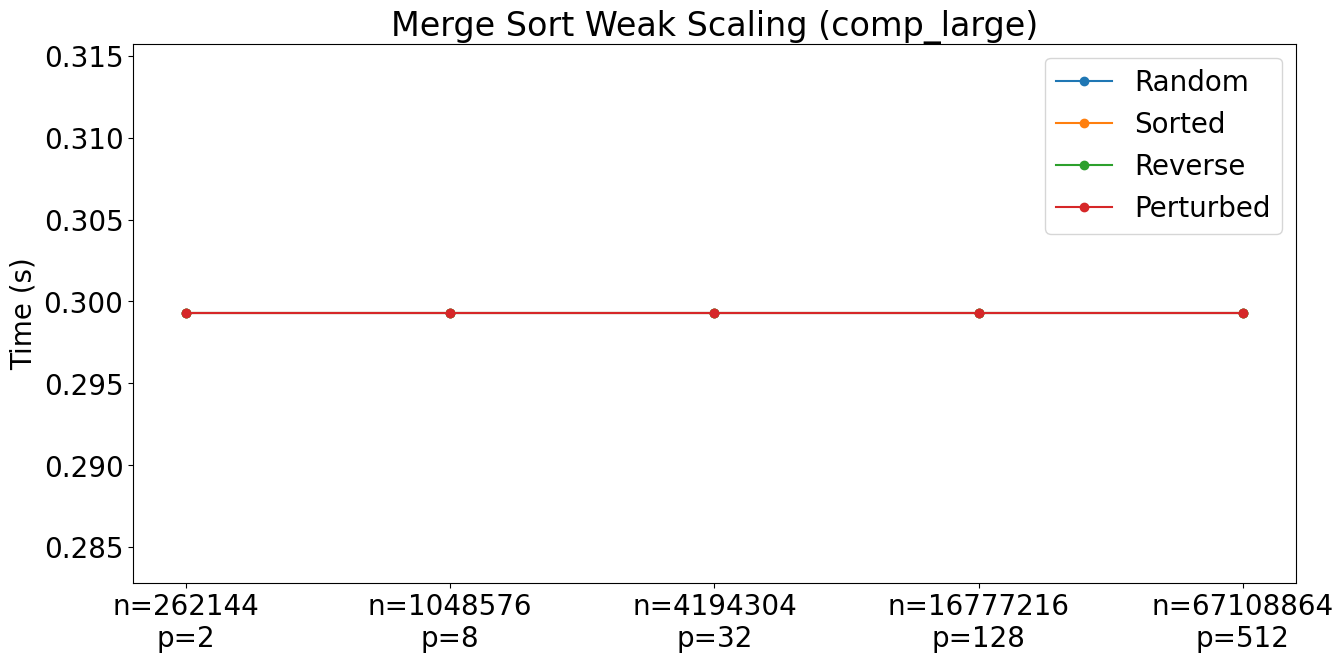

[]
[]
[]
[]


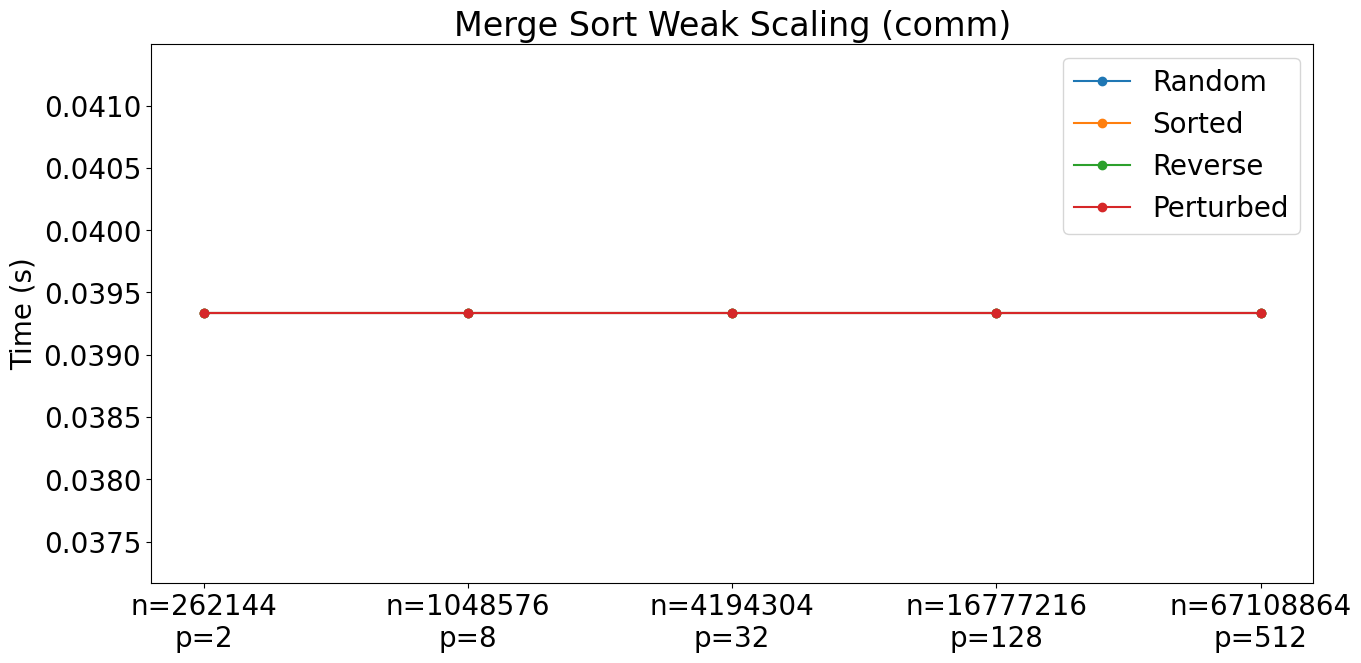

In [ ]:
# method developed with teammates, bugging out for some reason with my code design
title_template0 = "Merge Sort Weak Scaling ({})"

np_pairs= [(2**18, 2), (2**20, 8), (2**22, 32), (2**24, 128), (2**26, 512)]

measurement_regions = ['main', 'comp_large', 'comm']
input_type = ["Random", "Sorted", "Reverse", 'Perturbed']
x_labels = ['n={}\np={}'.format(n, p) for n, p in np_pairs]
data = {}
for itype in input_type:
    data[itype] = {region: [] for region in measurement_regions}

    for n, p in np_pairs:
        path = "/content/drive/My Drive/caliper/*.cali"
        print(path)
        tk_tmp = th.Thicket.from_caliperreader(glob(path))
        tk_tmp.metadata_column_to_perfdata("num_procs")
        tk_tmp.metadata_column_to_perfdata("input_size")
        for node in tk_tmp.graph.traverse():
            if (node.frame['name'] not in measurement_regions):
                continue

            value = list(tk_tmp.dataframe.loc[node, 'Avg time/rank'])[0]
            #print(value)
            data[itype][node.frame['name']].append(value)

for region in measurement_regions:
    title = title_template0.format(region)
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)

    for t in input_type:
        commRegion = data[t][region][5:]
        print(commRegion)
        if region == "main":
            ax.plot(range(len(commRegion)), commRegion, label=t, marker='o')
        else:
            ax.plot(range(len(data[t][region])), data[t][region], label=t, marker='o')

    ax.set_title(title)
    ax.set_ylabel('Time (s)')
    ax.legend()
    plt.xticks(range(len(np_pairs)))
    ax.set_xticklabels(x_labels)
    plt.show()

